# import files

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


# dataset Load

In [2]:
file_path = 'Cooking and Makeup Video.xlsx'
data = pd.read_excel(file_path)
df = data[data["Type"].isin(["Positive", "Negative"])]
df.head()

,Comment,React,Type
0,খুব সুন্দর হয়েছে আপু,1,Positive
1,আমার অনেক কষ্ট হয় মেকআপ করতে অনেক সুন্দর লাগছ...,0,Positive
2,"আপু মেকআপ খুব সুন্দর হয়েছে, আমার কাছে অনেক ভাল...",2,Positive
3,আপু পেছনের দেয়ালের রং টার জন্য লাইট টা বেশি ফ...,8,Positive
4,মাস-আল্লাহ খুব সুন্দর হয়েছে কিউট আপু,0,Positive


# Preprossing

In [3]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

# stop world remouve

In [4]:
# Read stop words from a text file
# Ensure each stop word is on a new line in the text file
file_path = "stopwold.txt"

with open(file_path, 'r', encoding='utf-8') as file:
    stop = [line.strip() for line in file]

# Display the first few stop words to verify
print("First few stop words:")
print(stop[:10])


First few stop words:
['আপু', 'না', 'ভালো', 'খুব', 'অনেক', 'কি', 'আমি', 'আমার', 'সুন্দর', 'করে']


In [5]:
# Define the stopword removal function
def stopword_removal(text):    
    words = str(text).split()  # Split the text into words
    filtered_words = [word for word in words if word not in stop]  # Remove stop words
    return ' '.join(filtered_words)  # Join the remaining words back into a single string

# Apply stop word removal to the 'Comments' column
df['cleanComments'] = df['Comment'].apply(stopword_removal)

# Display the first few rows to verify
df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8448\4111393017.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleanComments'] = df['Comment'].apply(stopword_removal)


,Comment,React,Type,cleanComments
0,খুব সুন্দর হয়েছে আপু,1,Positive,
1,আমার অনেক কষ্ট হয় মেকআপ করতে অনেক সুন্দর লাগছ...,0,Positive,আপু।
2,"আপু মেকআপ খুব সুন্দর হয়েছে, আমার কাছে অনেক ভাল...",2,Positive,"হয়েছে, লেগেছে,আপনাকে আপু।"
3,আপু পেছনের দেয়ালের রং টার জন্য লাইট টা বেশি ফ...,8,Positive,পেছনের দেয়ালের পড়েছে। সবসময়ের ️️️
4,মাস-আল্লাহ খুব সুন্দর হয়েছে কিউট আপু,0,Positive,মাস-আল্লাহ


# Stemming

In [6]:
# Import necessary libraries
import logging
from bangla_stemmer.stemmer import stemmer

# Suppress logs from the Bangla Stemmer library
logging.getLogger('bangla_stemmer').setLevel(logging.CRITICAL)

# Define the stemming function
def stem_text(text):
    stmr = stemmer.BanglaStemmer()  # Initialize the stemmer
    words = str(text).split()  # Split the text into words
    stemmed_words = stmr.stem(words)  # Perform stemming
    return ' '.join(stemmed_words)  # Join the stemmed words back into a single string

# Apply stemming to the 'Comments' column
df['stemmedComments'] = df['cleanComments'].apply(stem_text)

# Display the first few rows to verify the result
df.head()

applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
app

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8448\2464527527.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmedComments'] = df['cleanComments'].apply(stem_text)


,Comment,React,Type,cleanComments,stemmedComments
0,খুব সুন্দর হয়েছে আপু,1,Positive,,
1,আমার অনেক কষ্ট হয় মেকআপ করতে অনেক সুন্দর লাগছ...,0,Positive,আপু।,আপু।
2,"আপু মেকআপ খুব সুন্দর হয়েছে, আমার কাছে অনেক ভাল...",2,Positive,"হয়েছে, লেগেছে,আপনাকে আপু।","হয়েছে, লেগেছে,আপনা আপু।"
3,আপু পেছনের দেয়ালের রং টার জন্য লাইট টা বেশি ফ...,8,Positive,পেছনের দেয়ালের পড়েছে। সবসময়ের ️️️,পেছন দেয়াল পড়েছে। সবসময় ️️️
4,মাস-আল্লাহ খুব সুন্দর হয়েছে কিউট আপু,0,Positive,মাস-আল্লাহ,মাস-আল্লাহ


# Lemmatization

In [7]:
# Import necessary modules
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

# Download WordNet data (if not already downloaded)
nltk.download('wordnet')
nltk.download('omw-1.4')  # Download multilingual WordNet support (optional)

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the lemmatization function
def lemmatize_text_wordnet(text):
    # Split the text into words, lemmatize each word, and rejoin
    words = str(text).split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the stemmed comments
df['lemmatizedComments'] = df['stemmedComments'].apply(lemmatize_text_wordnet)

# Display the first few rows to verify the result
df.head()



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8448\269539579.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatizedComments'] = df['stemmedComments'].apply(lemmatize_text_wordnet)


,Comment,React,Type,cleanComments,stemmedComments,lemmatizedComments
0,খুব সুন্দর হয়েছে আপু,1,Positive,,,
1,আমার অনেক কষ্ট হয় মেকআপ করতে অনেক সুন্দর লাগছ...,0,Positive,আপু।,আপু।,আপু।
2,"আপু মেকআপ খুব সুন্দর হয়েছে, আমার কাছে অনেক ভাল...",2,Positive,"হয়েছে, লেগেছে,আপনাকে আপু।","হয়েছে, লেগেছে,আপনা আপু।","হয়েছে, লেগেছে,আপনা আপু।"
3,আপু পেছনের দেয়ালের রং টার জন্য লাইট টা বেশি ফ...,8,Positive,পেছনের দেয়ালের পড়েছে। সবসময়ের ️️️,পেছন দেয়াল পড়েছে। সবসময় ️️️,পেছন দেয়াল পড়েছে। সবসময় ️️️
4,মাস-আল্লাহ খুব সুন্দর হয়েছে কিউট আপু,0,Positive,মাস-আল্লাহ,মাস-আল্লাহ,মাস-আল্লাহ


# Changing Labels to Numbers

In [8]:
# Find unique labels in the 'Prediction' column
unique_labels = df['Type'].unique()
print("Unique labels in 'Prediction' column:")
print(unique_labels)
# Create a mapping of labels to numbers
label_to_number = {label: idx for idx, label in enumerate(unique_labels)}

# Print the mapping
print("\nMapping of labels to numbers:")
print(label_to_number)

# Replace labels in the 'Prediction' column with corresponding numbers
df['PredictionNumeric'] = df['Type'].map(label_to_number)
df.head()

Unique labels in 'Prediction' column:
['Positive' 'Negative']

Mapping of labels to numbers:
{'Positive': 0, 'Negative': 1}


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8448\1720907746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PredictionNumeric'] = df['Type'].map(label_to_number)


,Comment,React,Type,cleanComments,stemmedComments,lemmatizedComments,PredictionNumeric
0,খুব সুন্দর হয়েছে আপু,1,Positive,,,,0
1,আমার অনেক কষ্ট হয় মেকআপ করতে অনেক সুন্দর লাগছ...,0,Positive,আপু।,আপু।,আপু।,0
2,"আপু মেকআপ খুব সুন্দর হয়েছে, আমার কাছে অনেক ভাল...",2,Positive,"হয়েছে, লেগেছে,আপনাকে আপু।","হয়েছে, লেগেছে,আপনা আপু।","হয়েছে, লেগেছে,আপনা আপু।",0
3,আপু পেছনের দেয়ালের রং টার জন্য লাইট টা বেশি ফ...,8,Positive,পেছনের দেয়ালের পড়েছে। সবসময়ের ️️️,পেছন দেয়াল পড়েছে। সবসময় ️️️,পেছন দেয়াল পড়েছে। সবসময় ️️️,0
4,মাস-আল্লাহ খুব সুন্দর হয়েছে কিউট আপু,0,Positive,মাস-আল্লাহ,মাস-আল্লাহ,মাস-আল্লাহ,0


# Removing Null values

In [9]:
# Display the count of non-null values before dropping nulls
print("Non-null values before dropping:")
print(df.info())

# Drop rows with null values in the 'Comments' or 'Prediction' columns
df = df.dropna(subset=['lemmatizedComments', 'Type'])

# Display the count of non-null values after dropping nulls
print("\nNon-null values after dropping:")
print(df.info())

# Display the first few rows to verify
df.head()

Non-null values before dropping:
<class 'pandas.core.frame.DataFrame'>
Index: 29526 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Comment             29521 non-null  object
 1   React               29506 non-null  object
 2   Type                29526 non-null  object
 3   cleanComments       29526 non-null  object
 4   stemmedComments     29526 non-null  object
 5   lemmatizedComments  29526 non-null  object
 6   PredictionNumeric   29526 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.8+ MB
None

Non-null values after dropping:
<class 'pandas.core.frame.DataFrame'>
Index: 29526 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Comment             29521 non-null  object
 1   React               29506 non-null  object
 2   Type                29526 non-null  object
 

,Comment,React,Type,cleanComments,stemmedComments,lemmatizedComments,PredictionNumeric
0,খুব সুন্দর হয়েছে আপু,1,Positive,,,,0
1,আমার অনেক কষ্ট হয় মেকআপ করতে অনেক সুন্দর লাগছ...,0,Positive,আপু।,আপু।,আপু।,0
2,"আপু মেকআপ খুব সুন্দর হয়েছে, আমার কাছে অনেক ভাল...",2,Positive,"হয়েছে, লেগেছে,আপনাকে আপু।","হয়েছে, লেগেছে,আপনা আপু।","হয়েছে, লেগেছে,আপনা আপু।",0
3,আপু পেছনের দেয়ালের রং টার জন্য লাইট টা বেশি ফ...,8,Positive,পেছনের দেয়ালের পড়েছে। সবসময়ের ️️️,পেছন দেয়াল পড়েছে। সবসময় ️️️,পেছন দেয়াল পড়েছে। সবসময় ️️️,0
4,মাস-আল্লাহ খুব সুন্দর হয়েছে কিউট আপু,0,Positive,মাস-আল্লাহ,মাস-আল্লাহ,মাস-আল্লাহ,0


# Feature Extraction with TFIDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF transformer
max_features_values = [10000]  # Different max_features configurations
tfidf_transformers = {features: TfidfVectorizer(ngram_range=(1, 3), 
                                                lowercase=True, 
                                                max_features=features) 
                      for features in max_features_values}

# Apply TF-IDF transformation for each configuration
tfidf_results = {}

for features, transformer in tfidf_transformers.items():
    print(f"\nApplying TF-IDF with max_features={features}...")
    # Fit-transform on the entire dataset
    tfidf_matrix = transformer.fit_transform(df['lemmatizedComments'].values)
    tfidf_results[features] = tfidf_matrix  # Store the result
    
    # Print a summary
    print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Access one of the TF-IDF matrices
# Example: For max_features=10000
tfidf_10000 = tfidf_results[10000]

# Display the TF-IDF feature names (optional, only for smaller feature sizes)
print("\nSample TF-IDF feature names (for max_features=10000):")
print(tfidf_transformers[10000].get_feature_names_out()[:10])


Applying TF-IDF with max_features=10000...
TF-IDF matrix shape: (29526, 10000)

Sample TF-IDF feature names (for max_features=10000):
['00' '00 ১ঘন' '000 জর' '005' '01' '01 01' '01 01 2021' '01 2021'
 '01868158055' '03']


# DATASET Splitting (80% for train, 20% to test)

In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X = df['lemmatizedComments']  # Features: Comments
y = df['PredictionNumeric']  # Target: Numeric Prediction

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits to verify
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 23620
Testing set size: 5906


# Applying Stochastic Boosting Classifier Algorithm

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = df['lemmatizedComments']
y = df['PredictionNumeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply TF-IDF and train Stochastic Boosting Classifier in one step
tfidf_transformer = TfidfVectorizer(ngram_range=(1, 3), lowercase=True, max_features=10000)
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)

# Train the Stochastic Boosting Classifier model
stochastic_gradient_boosting_model = GradientBoostingClassifier(
    random_state=42, n_estimators=100, subsample=0.8
)
stochastic_gradient_boosting_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = stochastic_gradient_boosting_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6464213140663807


In [13]:
print("Unique labels in y_test:", set(y_test))
print("Unique labels in y_pred:", set(y_pred))

Unique labels in y_test: {0, 1}
Unique labels in y_pred: {0, 1}


# Confusion Matrix

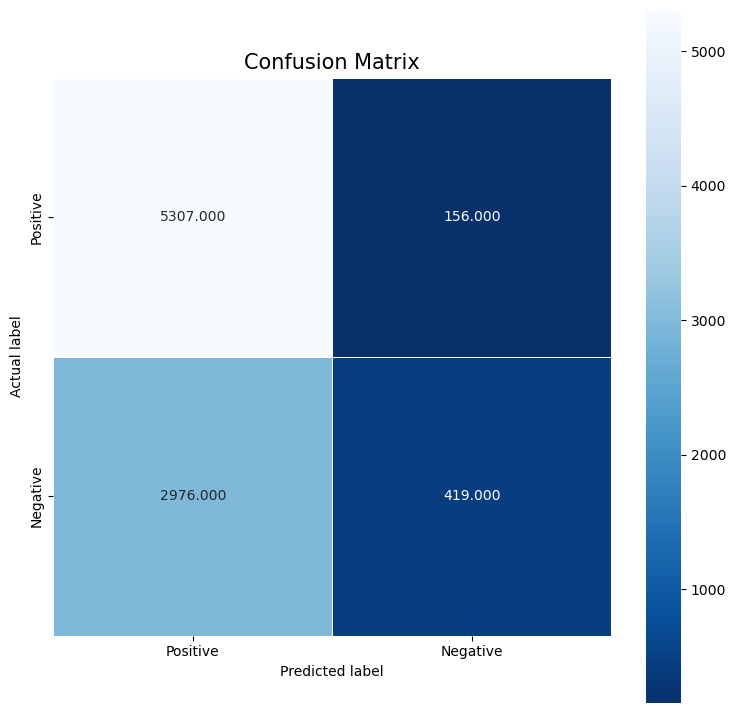

In [14]:
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the labels based on the unique classes in your data
labels = ['Positive', 'Negative']  # These correspond to classes 0, 2, and 3

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot Confusion Matrix as a heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(cm_df, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.show()

# Classification Report

In [15]:
from sklearn.metrics import classification_report

# Create classification report using y_test and y_pred
report = pd.DataFrame(classification_report(y_test, y_pred, target_names=labels, output_dict=True)).transpose()

# Round precision, recall, and f1-score to 2 decimal places
report[['precision', 'recall', 'f1-score']] = report[['precision', 'recall', 'f1-score']].apply(lambda x: round(x * 100, 2))

# Display the report
display(report)

,precision,recall,f1-score,support
Positive,64.07,97.14,77.22,5463.000000
Negative,72.87,12.34,21.11,3395.000000
accuracy,64.64,64.64,64.64,0.646421
macro avg,68.47,54.74,49.16,8858.000000
weighted avg,67.44,64.64,55.71,8858.000000


# ROC curve

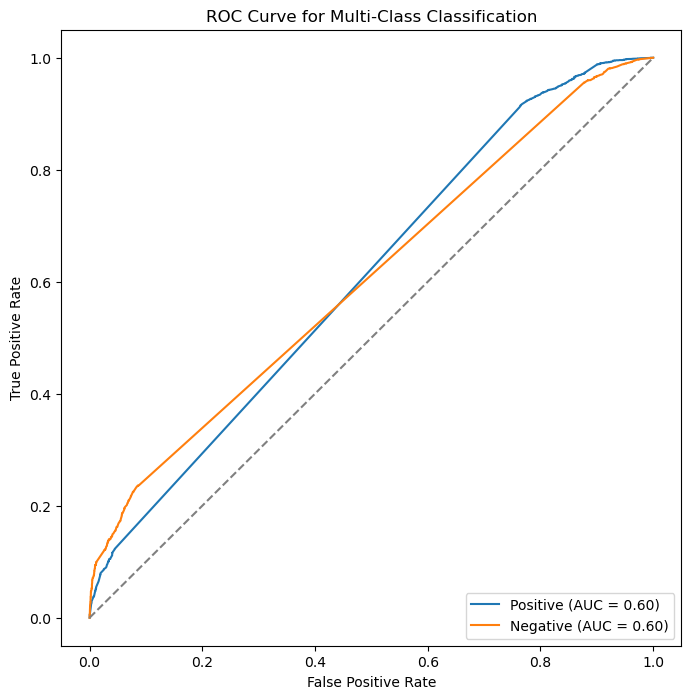

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

# Ensure 'labels' match the number of unique classes, treating 'Neutral' and 'neutral' as separate
labels = ['Positive', 'Negative']  # Adjust based on your dataset

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Use correct class indices, make sure 0, 1, 2, 3 correspond to 'Positive', 'Neutral', 'Negative', 'neutral'
y_pred_prob = stochastic_gradient_boosting_model.predict_proba(X_test_tfidf)  # Probability estimates for each class

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(labels)):
    # Compute ROC curve for each class
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calculate AUC for each class

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))

# Iterate through each class to plot individual ROC curve
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line for random predictions
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()


# Precision Recall Curve

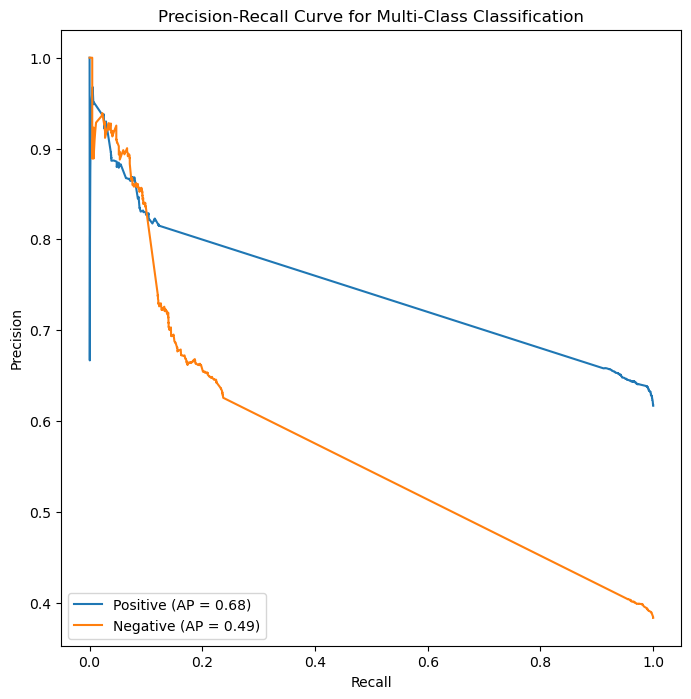

In [17]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Labels for the classes, make sure they match your dataset
labels = ['Positive','Negative']  # Adjust based on your dataset

# Calculate Precision-Recall curve and Average Precision Score for each class
precision, recall, average_precision = {}, {}, {}

# Iterate through each class and compute precision-recall curves and average precision scores
for i in range(len(labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 8))

# Loop through each class and plot the Precision-Recall curve
for i in range(len(labels)):
    plt.plot(recall[i], precision[i], label=f'{labels[i]} (AP = {average_precision[i]:.2f})')

# Label the axes and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class Classification')

# Display legend in the lower left corner
plt.legend(loc='lower left')

# Show the plot
plt.show()
